# Notes on Chapter 4 of *Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow* by Aurélien Géron

Basic SVC example with Iris dataset

In [52]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

In [71]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length and width
y = (iris['target'] == 2).astype(np.float64) # Iris virginica

In [72]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

Let's make a simple plotting function to see the decision boundary (similar to the plots the author shows)

In [73]:
def plot_2D_classifier(m, X, y):
    axis_mins = np.min(X, axis=0)
    axis_maxs = np.max(X, axis=0)
    axis_range = axis_maxs - axis_mins
    
    axis_padding = 0.05 * axis_range
    axis_mins = -axis_padding + axis_mins
    axis_maxs = axis_padding + axis_maxs
    axis_range = 2*axis_padding + axis_range
    
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlim(axis_mins[0], axis_maxs[0])
    plt.ylim(axis_mins[1], axis_maxs[1])
    
    uv = np.linspace(axis_mins, axis_maxs, 300)
    grid_u, grid_v = np.meshgrid(uv[:,0], uv[:,1])
    grid_X = np.hstack(
        (grid_u.flatten()[:,np.newaxis],
         grid_v.flatten()[:,np.newaxis]))
    grid_y = m.predict(grid_X).reshape(grid_u.shape)
    plt.contour(grid_u, grid_v, grid_y)    

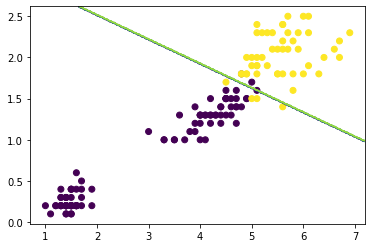

In [74]:
plot_2D_classifier(svm_clf, X, y)

Non-linear example.  We start by loading a synthetic non-linear dataset.

In [75]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15)

This obviously will not work well with a simple linear model:

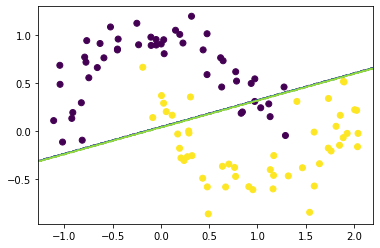

In [79]:
svm_clf.fit(X, y)
plot_2D_classifier(svm_clf, X, y)

Next, we fit by adding polynomial features.

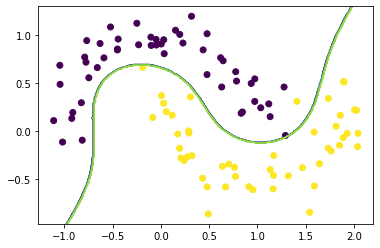

In [81]:
from sklearn.preprocessing import PolynomialFeatures

poly_svm = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000))
])

poly_svm.fit(X, y)
plot_2D_classifier(poly_svm, X, y)

We potentially can have better performance with polynomial kernels:

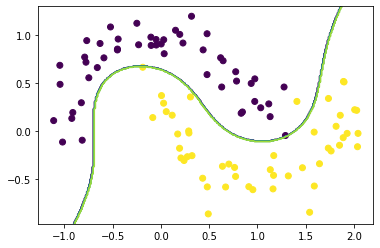

In [77]:
from sklearn.svm import SVC
polyk_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5, max_iter=5000))
])

polyk_svm.fit(X, y)
plot_2D_classifier(polyk_svm, X, y)

We can also try radial basis functions:

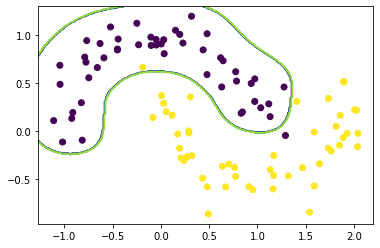

In [78]:
rbf_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001, max_iter=5000))
])

rbf_svm.fit(X, y)
plot_2D_classifier(rbf_svm, X, y)